Progetto: **Classificazione di testi descrittivi per destinazione d'uso, inerenti ai beni sottoposti ad aste giudiziarie italiane.**

Studente: **Alessandro Monolo** | *10439147*

Relatore: Marco Brambilla

Referente aziendale: Simone Redaelli

Master: Data Science & Artificial Intelligence

Università: Politecnico di Milano

<hr style="border:1px solid black">

## Stratified Cross Validation, Train Test Split & Prediction Model con "Logistic Regression


- **1.** **Divido** il **data frame** in **X** e **y**, ovvero mettendo tutte le variabili numeriche ricavate in X e la target variable da predirre in y;


- **2.** Apppico **StratifiedKFold** e **Train_Test Split** alle variabili indipendenti per poi applicare il modello supervisionato **Logistic Regression** per ottenere le **metriche di valutazione**;
    - **StratifiedKFold** è una tecnica di **cross-validation** comunemente utilizzata nell'apprendimento automatico quando si lavora con **dataset sbilanciati**, come il mio, o quando si desidera garantire che ciascun fold (sottoinsieme) del dataset mantenga la stessa distribuzione delle classi del dataset originale. È particolarmente utile quando si desidera **valutare le prestazioni del proprio modello preservando la proporzione delle diverse classi**.
    

- **3.** Costituisco una **Confusion Matrix** per controllare quanti **errori** e **predizioni corrette** sono state performate;


- **4.** Valutazione dei **Coefficienti** del modello **Logistic Regression**;


- **5.** **Conclusioni**.


<hr style="border:1px solid black">

**Importo le librerie che mi servono:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

#### Set pandas options:

In [2]:
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.6f}'.format
pd.options.mode.chained_assignment = None

#### Importo il file CSV per modello: Linear Regrression

In [3]:
df_lr = pd.read_csv("D:\\Master_Cefriel_DS_AI_Monolo\\0_Project_Work\\Dataset\\9_Dataset_Logistic_Regression\\Dataset_Logistic_Regression.csv")

<hr style="border:1px solid black">

### 1 - Divido il data frame in X e y, ovvero mettendo tutte le variabili numeriche ricavate in X e la target variable da predirre in y

In [4]:
X_lr = df_lr.drop(columns=['Destinazione_Uso_Encoded', 'Catasto_Fabbricati_Int'])
y_lr = df_lr['Destinazione_Uso_Encoded']

- Dopo aver testato il modello con la colonna **"Catasto_Fabbricati_Int"**, noto che la classe **LAND** ha un'accuracy del 100% con tutte le fold (3, 5, 7, 10).
- Quindi essendo strettamente identificante la classe LAND è corretto **eliminare** il campo dalla variabile X, ovvero dalle variabili indipendenti per il modello predittivo.

### 2- Apppico stratifiedKFold e Train Test Split alle variabili indipendenti per ottenere le metriche di valutazione inerenti al modello predittivo Logistic Regression:

In [5]:
folds = StratifiedKFold(n_splits=5)

score_precision = []
score_f1 = []
score_recall = []

all_test_indices = []
all_predictions = []

for train_index, test_index in folds.split(X_lr, y_lr):
    X_train, X_test, y_train, y_test = X_lr.iloc[train_index], X_lr.iloc[test_index], \
                                       y_lr.iloc[train_index], y_lr.iloc[test_index]
    
    logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr', C=0.1, max_iter=1000)
    logistic_model.fit(X_train, y_train)
    lr_predictions = logistic_model.predict(X_test)
    
    precision = precision_score(y_test, lr_predictions, average='macro', zero_division=0)
    recall = recall_score(y_test, lr_predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, lr_predictions, average='macro', zero_division=0)    

    score_precision.append(precision)
    score_recall.append(recall)
    score_f1.append(f1)
    
    all_test_indices.extend(test_index)
    all_predictions.extend(lr_predictions)

mean_precision = np.mean(score_precision)
mean_recall = np.mean(score_recall)
mean_f1 = np.mean(score_f1)    

classification_report_str = classification_report(y_lr.iloc[all_test_indices], all_predictions, zero_division=0)

print("Classification Report, averaged over all folds:\n")
print(classification_report_str, "\n")
print("Precision:", round(mean_precision, 2))
print("Recall:", round(mean_recall, 2))
print("F1-Score:", round(mean_f1, 2))

Classification Report, averaged over all folds:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       550
           1       0.00      0.00      0.00       560
           2       0.13      0.08      0.10      2269
           3       0.98      0.83      0.90      5804
           4       0.77      0.66      0.71    132207
           5       0.02      0.00      0.00      7743
           6       0.02      0.06      0.03     16907

    accuracy                           0.56    166040
   macro avg       0.27      0.23      0.25    166040
weighted avg       0.65      0.56      0.60    166040
 

Precision: 0.35
Recall: 0.23
F1-Score: 0.25


### 3 - Costituisco una confusion matrix per controllare quanti errori e predizioni corrette sono state eseguite

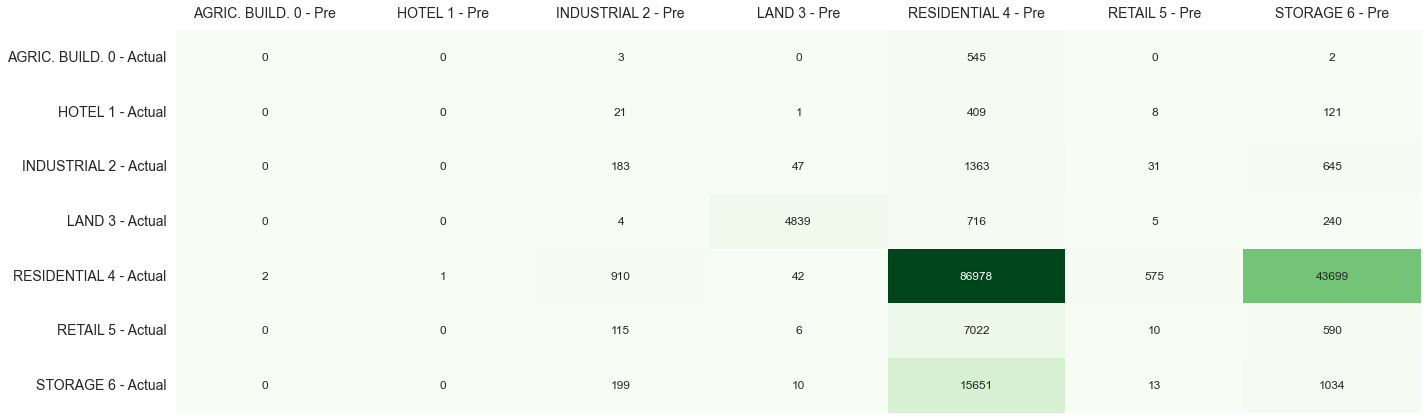

In [6]:
cm_pred = confusion_matrix(y_lr.iloc[all_test_indices], all_predictions)
cm_pred = pd.DataFrame(cm_pred,
                       index=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                       columns = ['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'])

# Mostro la confusion matrix su una heatmap:
sns.set(rc={'figure.figsize':(20,6)})
heatmap = sns.heatmap(cm_pred, 
            annot=True, 
            cmap="Greens", 
            fmt="d", 
            xticklabels=['AGRIC. BUILD. 0 - Pre','HOTEL 1 - Pre','INDUSTRIAL 2 - Pre','LAND 3 - Pre','RESIDENTIAL 4 - Pre','RETAIL 5 - Pre','STORAGE 6 - Pre'], 
            yticklabels=['AGRIC. BUILD. 0 - Actual','HOTEL 1 - Actual','INDUSTRIAL 2 - Actual','LAND 3 - Actual','RESIDENTIAL 4 - Actual','RETAIL 5 - Actual','STORAGE 6 - Actual'],
                     cbar=False)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)

plt.tick_params(axis='x', labeltop=True, labelbottom=False)
plt.tight_layout()
plt.show()

In [9]:
print("Numero predizioni corrette: ", 0+0+183+4839+86978+10+1034)
print("Numero predizioni sbagliate: ", 166040-(0+0+183+4839+86978+10+1034))

Numero predizioni corrette:  93044
Numero predizioni sbagliate:  72996


### 4 - Valutazione dei coefficienti del modello Logistic Regression

In [8]:
coefficients = logistic_model.coef_
Colonne_X_Lr = X_lr.columns.to_list()
coef_dict = {'Feature': Colonne_X_Lr, 'Coefficient': coefficients[0]}
coef_df = pd.DataFrame(coef_dict)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
display('Top 10 coefficients:', coef_df.head(5))
display('Least 10 coefficients:', coef_df.tail(5))

'Top 10 coefficients:'

,Feature,Coefficient
14,Regione_Sicilia,1.930432
43,Provincia_CL,1.057195
290,Tribunale_TIVOLI,0.910581
156,Tribunale_CALTAGIRONE,0.873383
187,Tribunale_FOGGIA,0.863100


'Least 10 coefficients:'

,Feature,Coefficient
77,Provincia_NAP,-0.712633
6,Regione_Lazio,-0.719120
238,Tribunale_PALERMO,-0.780119
15,Regione_Toscana,-0.824331
8,Regione_Lombardia,-0.919453


<hr style="border:1px solid black">

### 5 - Conclusioni

Con **N° fold uguale a 5**, queste sono le metriche di valutazione del modello:

- **Metrics**:
    - Precision: 0.35;
    - Recall: 0.23;
    - <u>**F1-Score: 0.25**</u>;



- **Logistic Regression Accuracy score Mean**: 
    - Mean Accuracy Score:  0.56;
    

- **Predizioni corrette** ed **Errori** e del modello:
    - Numero predizioni corrette:  **93.044**;
    - Numero predizioni sbagliate:  **72.996**;


<hr style="border:1px solid black">


#### In conclusione


- C'è una **buona quantità di predizione corrette** per quanto riguarda le classi: **Land**, **Residential**.
- Una **scarsa predizione**, quasi vicina allo 0, per le classi: **Storage** e **Industrial**.
- Infine, le predizioni praticamente **uguali a 0** sono inerenti alle classi: **Hotel**, **Agricultural Building** e **Retail**.

- Il valore di riferimento relativo all'**accuracy** raggiunta è pari in questo caso a **0.56**;
- Il **Benchmark** di riferimento in questo caso è **F1-Score**, pari a: **0.25**;
    - *L'F1-Score è una metrica di valutazione utilizzata in machine learning per misurare la precisione di un modello di classificazione, come la logistic regression, sulla base delle previsioni effettuate dal modello. In particolare, l'F1-Score tiene conto di due importanti metriche di valutazione: la precision e il recall. Queste metriche sono calcolate a partire dalla matrice di confusione, che è una tabella che mostra il numero di veri positivi (TP), falsi positivi (FP), veri negativi (TN) e falsi negativi (FN) generati dal modello.*
    - L'**F1-Score è particolarmente utile quando si tratta di problemi di classificazione in cui le classi sono sbilanciate** o quando si desidera trovare un equilibrio tra precisione e recall.
    - In questo caso, viene impiegato il parametro **Average: "Macro"**, per conferire l' F1 Score di ogni classe la medesima importanza, a prescindere dal numero di osservazioni presenti per ogni singola classe della target variable.
    

- I **cinque coefficienti** con peso maggiore (**positivo**) sono i seguenti:
    - *Regione_Sicilia*;
    - *Provincia_CL*;
    - *Tribunale_TIVOLI*;
    - *Tribunale_CALTAGIRONE*;
    - *Tribunale_FOGGIA*;
    
- I **cinque coefficienti** con peso maggiore (**negativo**) sono i seguenti:
    - *Provincia_NAP*;
    - *Regione_Lazio*;
    - *Tribunale_PALERMO*;
    - *Regione_Toscana*;
    - *Regione_Lombardia*;
    
    
- Le colonne inerenti all'ubicazione sia per **Regione**, per **Provincia** e per **Tribunale** di assegnazione, hanno in determinati casi un **ruolo importante nella fase di predizione delle classi**.